## Assignment No: 02
Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. 
Dataset Description: The case study is from an open-source dataset from Kaggle. 
The dataset contains 10,000 sample points with 14 distinct features such as 
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 
Link to the Kaggle project: 
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 
Perform following steps: 
1. Read the dataset. 
2. Distinguish the feature and target set and divide the data set into training and test sets. 
3. Normalize the train and test data. 
4. Initialize and build the model. Identify the points of improvement and implement the same. 
5. Print the accuracy score and confusion matrix (5 points).

# 1. Import Libraries

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.32.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
    --------------------------------------- 7.1/331.9 MB 33.6 MB/s eta 0:00:10
   - -------------------------------------- 14.2/331.9 MB 34.2 MB/s eta 0:00:10
   -- ------------------------------------- 19.1/331.9 MB 30.2 MB/s eta 0:00:11
   -- -------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Load Dataset

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Preprocessing: Feature/Target Split

In [5]:
# Drop unnecessary columns (CustomerId, Surname, RowNumber don’t help prediction)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])   # Male=1, Female=0

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data:", X_train.shape)
print("Test data:", X_test.shape)


Training data: (8000, 11)
Test data: (2000, 11)


# Normalize Data

In [6]:
# Normalize using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Build Neural Network

In [7]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with dropout to avoid overfitting
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1)


C:\Users\Anjali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7211 - loss: 0.5971 - val_accuracy: 0.8000 - val_loss: 0.5036
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7912 - loss: 0.5037 - val_accuracy: 0.8000 - val_loss: 0.4647
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.4738 - val_accuracy: 0.8000 - val_loss: 0.4452
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7991 - loss: 0.4548 - val_accuracy: 0.8031 - val_loss: 0.4343
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8045 - loss: 0.4370 - val_accuracy: 0.8125 - val_loss: 0.4268
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8086 - loss: 0.4298 - val_accuracy: 0.8256 - val_loss: 0.4215
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8122 - loss: 0.4204 - val_accuracy: 0.8275 - val_loss: 0.4141
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8175 - loss: 0.4114 - val_accuracy: 0.

# Model Evaluation

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.857


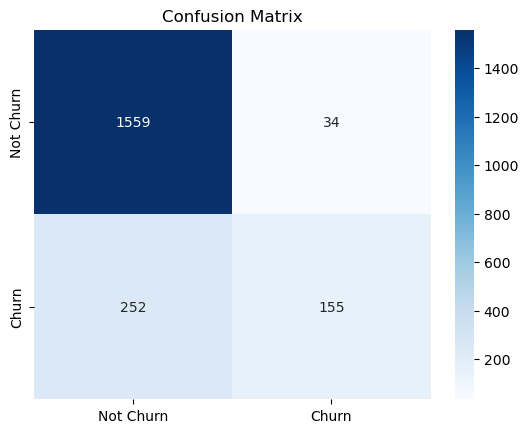

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.82      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [8]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))


# Plot Training Performance

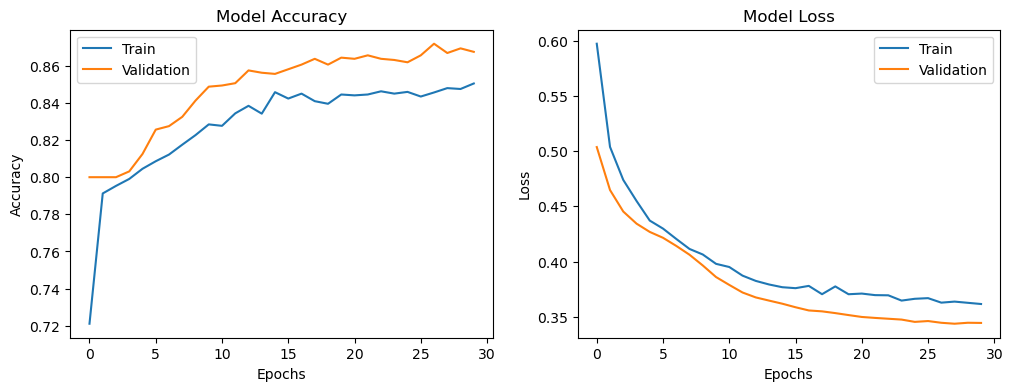

In [9]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()